In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [149]:
df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\archive (3)\\IRIS.csv')

In [150]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [151]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [154]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [155]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

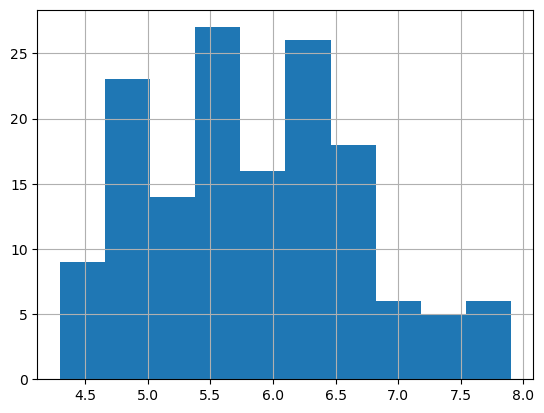

In [156]:
df['sepal_length'].hist()

<Axes: >

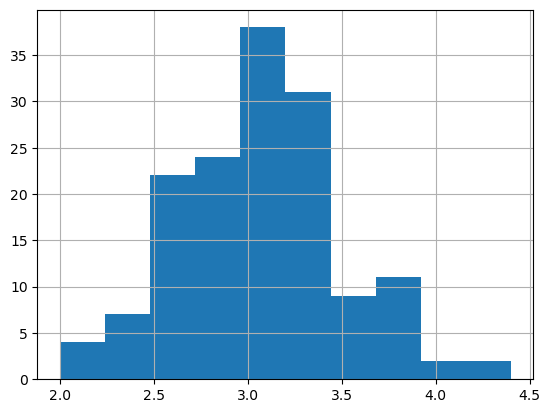

In [157]:
df['sepal_width'].hist()

<Axes: >

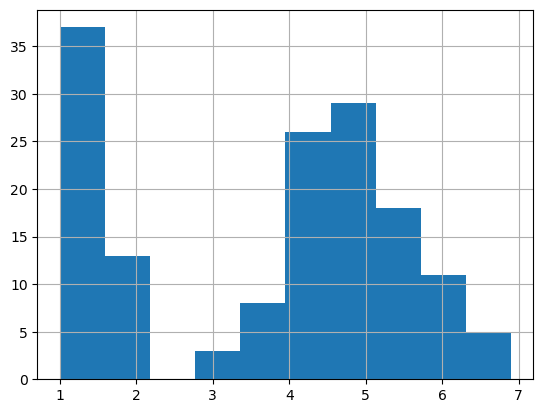

In [158]:
df['petal_length'].hist()

<Axes: >

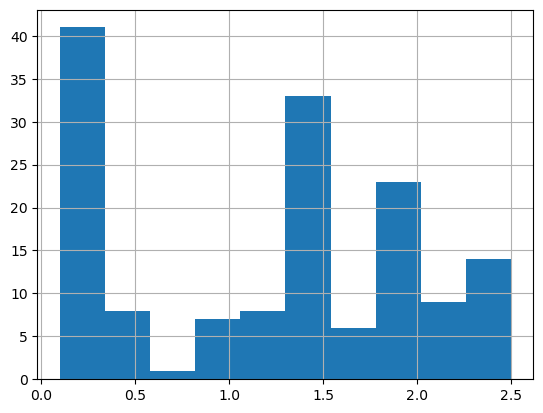

In [159]:
df['petal_width'].hist()

In [160]:
# scatterplot
colors = ['red', 'orange','blue']
species = ['Iris-setosa',
'Iris-versicolor','Iris-virginica']

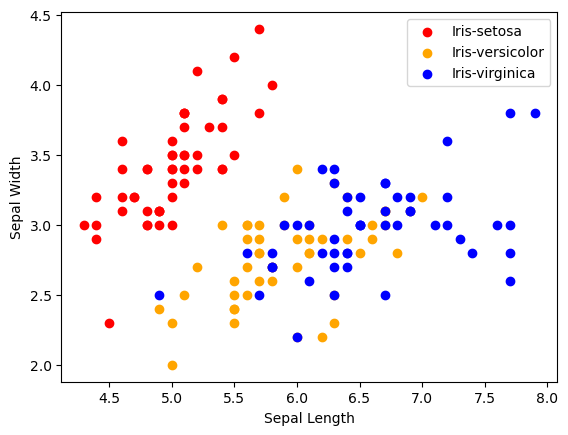

In [161]:
 for i in range(3):
        x = df[df['species']==species[i]]
        plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
        plt.xlabel("Sepal Length")
        plt.ylabel("Sepal Width")
        plt.legend()

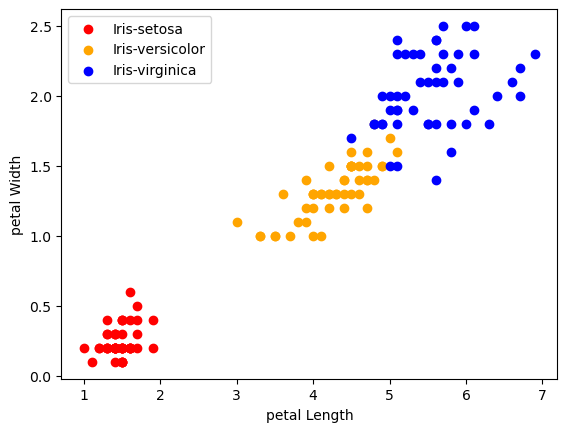

In [162]:
 for i in range(3):
        x = df[df['species']==species[i]]
        plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
        plt.xlabel("petal Length")
        plt.ylabel("petal Width")
        plt.legend()

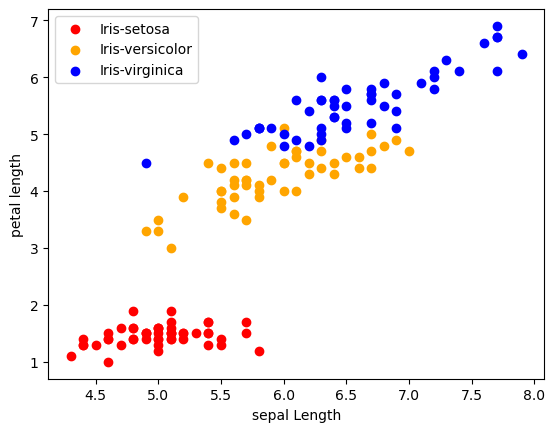

In [163]:
for i in range(3):
        x = df[df['species']==species[i]]
        plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
        plt.xlabel("sepal Length")
        plt.ylabel("petal length")
        plt.legend()

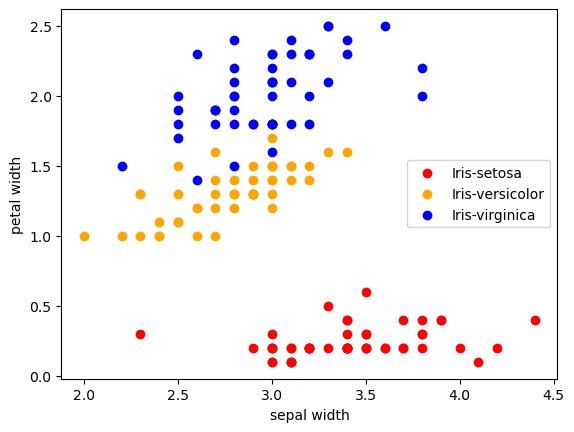

In [164]:
for i in range(3):
        x = df[df['species']==species[i]]
        plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
        plt.xlabel("sepal width")
        plt.ylabel("petal width")
        plt.legend()

In [165]:
# Assuming 'df' is your DataFrame and you want to calculate the correlation between columns 'column1' and 'column2'.
columns_to_correlate = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
correlation_matrix = df[columns_to_correlate].corr()
print (correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

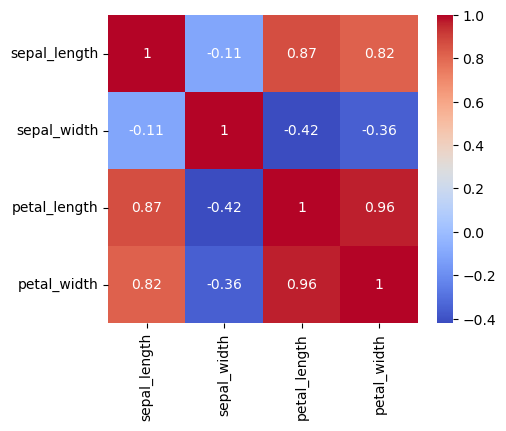

In [166]:
corr = df[columns_to_correlate].corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [168]:
df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [169]:
from sklearn.model_selection import train_test_split
# train - 80
# test - 20
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [170]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [171]:
model.fit(x_train, y_train)

LogisticRegression()

In [172]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [173]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [174]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [175]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [176]:

# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [177]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [178]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [179]:
model.predict(x_test)

array([2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2])

In [180]:
print(y_test)

106    2
50     1
37     0
53     1
48     0
58     1
92     1
61     1
85     1
87     1
7      0
11     0
105    2
122    2
139    2
19     0
81     1
69     1
93     1
123    2
77     1
12     0
115    2
100    2
117    2
38     0
134    2
44     0
4      0
145    2
Name: species, dtype: int32


In [181]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667
